In [14]:
# Import all functions needed in the notebook
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from reactions import run_model_sm1 as run_model

In [15]:
# This is a helper function we use to apply over our data frame. Should not be edited
def wrap_runmodel(argument):
    concentrations = argument.to_dict()
    concentrations["NO"] = 0
    concentrations["H2SO4"] = 0
    concentrations["HNO3"] = 0
    run_model(concentrations)
    argument["H2SO4"] = concentrations["H2SO4"]
    argument["HNO3"] = concentrations["HNO3"]

    return argument

In [16]:
# Create the data needed for plotting

# The constituents below are the ones that we want to vary.
constituents = ["O2", "NO2"]

# These are the values the will be used for the constituents. As is it will be (0, 1, 2, 3...20)/2 = (0, 0.5, 1...10)
values = [i / 2 for i in range(21)]

result = pd.DataFrame(
    itertools.product(values, repeat=len(constituents)), columns=constituents
)
# The remaining parameters are set to 0. It is possible to swap parameters to be varied and to be constant
# For instance by replacing e.g O2 with H2S in the list of constituents. The value of O2 must then be defaulted here.
result["H2O"] = 30
result["SO2"] = 10
result["H2S"] = 0

result = result.apply(wrap_runmodel, axis=1)

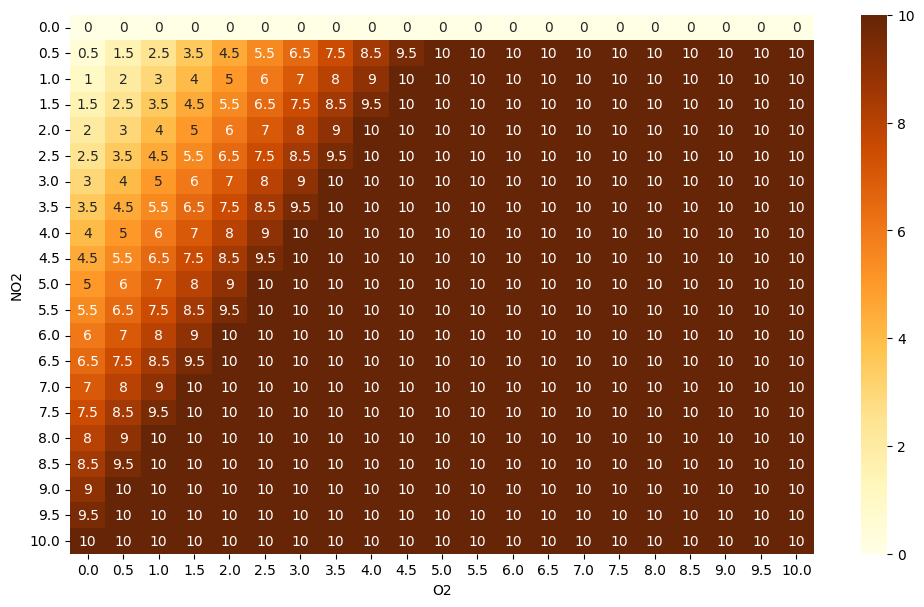

In [25]:
# Specify size for the final figure here
fig, ax = plt.subplots(figsize=(12,7))

# The index parameter is used as the "vertical" axis, while the column parameter is the "horizontal" axis
plot_df = result.pivot_table(index="NO2", columns="O2",values="H2SO4")
sns.heatmap(plot_df, annot=True, ax=ax, cmap="YlOrBr")

# Export the values to a csv table (note this will overwrite each time the codeblock is run)
plot_df.to_csv("H2SO4_table.csv")
